In [1]:
import pandas as pd

df = pd.read_csv(r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\Airbnb.csv")


In [2]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)


In [3]:
df = df[df['date'].notna()]


In [4]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')


In [5]:
numeric_cols = ['open', 'high', 'low', 'close', 'adjusted_close', 'volume']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [6]:
df['daily_return'] = df['close'].pct_change()


In [7]:
df['volatility_7d'] = df['daily_return'].rolling(7).std()
df['volatility_30d'] = df['daily_return'].rolling(30).std()


In [8]:
df['ma_7'] = df['close'].rolling(7).mean()
df['ma_30'] = df['close'].rolling(30).mean()
df['ma_90'] = df['close'].rolling(90).mean()


In [9]:
df['intraday_range'] = df['high'] - df['low']


In [10]:
df.columns


Index(['date', 'open', 'high', 'low', 'close', 'adjusted_close', 'volume',
       'daily_return', 'volatility_7d', 'volatility_30d', 'ma_7', 'ma_30',
       'ma_90', 'intraday_range'],
      dtype='object')

In [11]:
df.head()

,date,open,high,low,close,adjusted_close,volume,daily_return,volatility_7d,volatility_30d,ma_7,ma_30,ma_90,intraday_range
1,2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500,NaN,NaN,NaN,NaN,NaN,NaN,23.750000
2,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,-0.037731,NaN,NaN,NaN,NaN,NaN,16.399994
3,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,-0.066427,NaN,NaN,NaN,NaN,NaN,10.139999
4,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,-0.040000,NaN,NaN,NaN,NaN,NaN,6.099998
5,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,0.105689,NaN,NaN,NaN,NaN,NaN,17.089996


In [12]:
df['volume_change'] = df['volume'].pct_change()


In [13]:
delta = df['close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss
df['rsi_14'] = 100 - (100 / (1 + rs))


In [14]:
df['candle_body'] = (df['close'] - df['open']).abs()


In [15]:
df['direction'] = (df['close'] > df['open']).astype(int)


In [16]:
df = df.dropna().reset_index(drop=True)


In [17]:
df.head()


,date,open,high,low,close,adjusted_close,volume,daily_return,volatility_7d,volatility_30d,ma_7,ma_30,ma_90,intraday_range,volume_change,rsi_14,candle_body,direction
0,2021-04-21,168.089996,170.320007,164.119995,167.070007,167.070007,3878600,-0.014743,0.016824,0.029538,174.234288,185.046667,177.968112,6.200012,-0.152219,22.704653,1.019989,0
1,2021-04-22,168.490005,176.919998,168.429993,170.710007,170.710007,3856500,0.021787,0.019520,0.029854,173.200003,184.610668,178.257000,8.490005,-0.005698,28.915057,2.220001,1
2,2021-04-23,172.919006,178.250000,172.000000,174.250000,174.250000,3329900,0.020737,0.021824,0.026312,172.888576,183.823335,178.645889,6.250000,-0.136549,35.720821,1.330994,1
3,2021-04-26,175.210007,176.031006,171.070007,174.880005,174.880005,2549400,0.003616,0.021796,0.024708,172.821433,182.761335,179.144556,4.960999,-0.234391,31.456531,0.330002,0
4,2021-04-27,176.164993,179.610001,174.800003,177.940002,177.940002,2883000,0.017498,0.021575,0.024762,172.714290,181.693001,179.735000,4.809998,0.130854,47.043165,1.775009,1


In [18]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjusted_close', 'volume',
       'daily_return', 'volatility_7d', 'volatility_30d', 'ma_7', 'ma_30',
       'ma_90', 'intraday_range', 'volume_change', 'rsi_14', 'candle_body',
       'direction'],
      dtype='object')

In [19]:
output_path = r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\airbnb_cleaned_features.csv"
df.to_csv(output_path, index=False)


In [21]:
first_30 = df.head(30)
output_path_30 = r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\airbnb_first_30_rows.csv"
first_30.to_csv(output_path_30, index=False)


In [22]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1180 non-null   datetime64[ns]
 1   open            1180 non-null   float64       
 2   high            1180 non-null   float64       
 3   low             1180 non-null   float64       
 4   close           1180 non-null   float64       
 5   adjusted_close  1180 non-null   float64       
 6   volume          1180 non-null   int64         
 7   daily_return    1180 non-null   float64       
 8   volatility_7d   1180 non-null   float64       
 9   volatility_30d  1180 non-null   float64       
 10  ma_7            1180 non-null   float64       
 11  ma_30           1180 non-null   float64       
 12  ma_90           1180 non-null   float64       
 13  intraday_range  1180 non-null   float64       
 14  volume_change   1180 non-null   float64       
 15  rsi_

,count,mean,min,25%,50%,75%,max,std
date,1180,2023-08-24 07:15:39.661017088,2021-04-21 00:00:00,2022-06-21 18:00:00,2023-08-23 12:00:00,2024-10-24 06:00:00,2025-12-30 00:00:00,NaN
open,1180.0,134.557738,82.970001,119.73,132.93,148.244999,207.0,21.43572
high,1180.0,136.898524,84.25,121.620003,134.924995,150.419998,212.584,21.806596
low,1180.0,132.35021,81.910004,117.437748,131.294998,145.873997,204.160004,21.077345
close,1180.0,134.691411,82.489998,119.837498,132.985001,148.324997,207.210007,21.445027
adjusted_close,1180.0,134.691411,82.489998,119.837498,132.985001,148.324997,207.210007,21.445027
volume,1180.0,5760284.661017,1457200.0,3813075.0,4777700.0,6454525.0,74788500.0,4101593.712676
daily_return,1180.0,0.000215,-0.13425,-0.014698,0.000514,0.014454,0.147885,0.028175
volatility_7d,1180.0,0.025165,0.005779,0.015682,0.02181,0.030798,0.076178,0.013141
volatility_30d,1180.0,0.026781,0.010449,0.019521,0.024564,0.033253,0.050382,0.009396


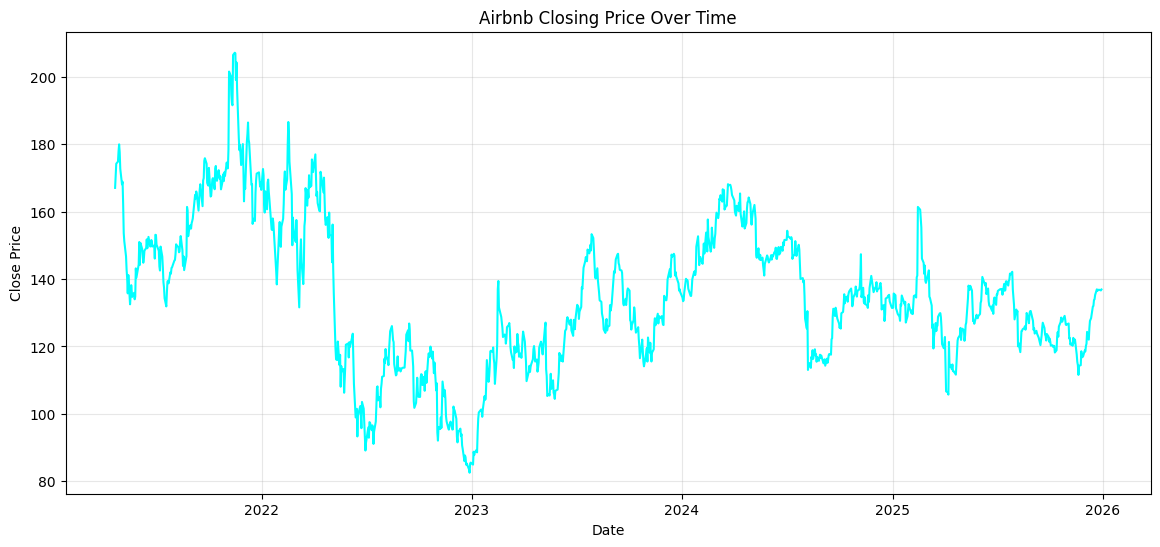

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['date'], df['close'], color='cyan')
plt.title("Airbnb Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True, alpha=0.3)
plt.show()


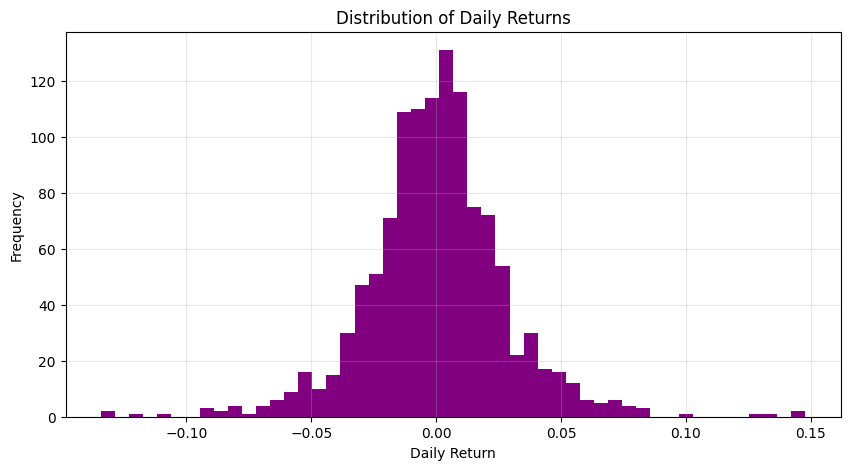

In [24]:
plt.figure(figsize=(10,5))
df['daily_return'].hist(bins=50, color='purple')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()


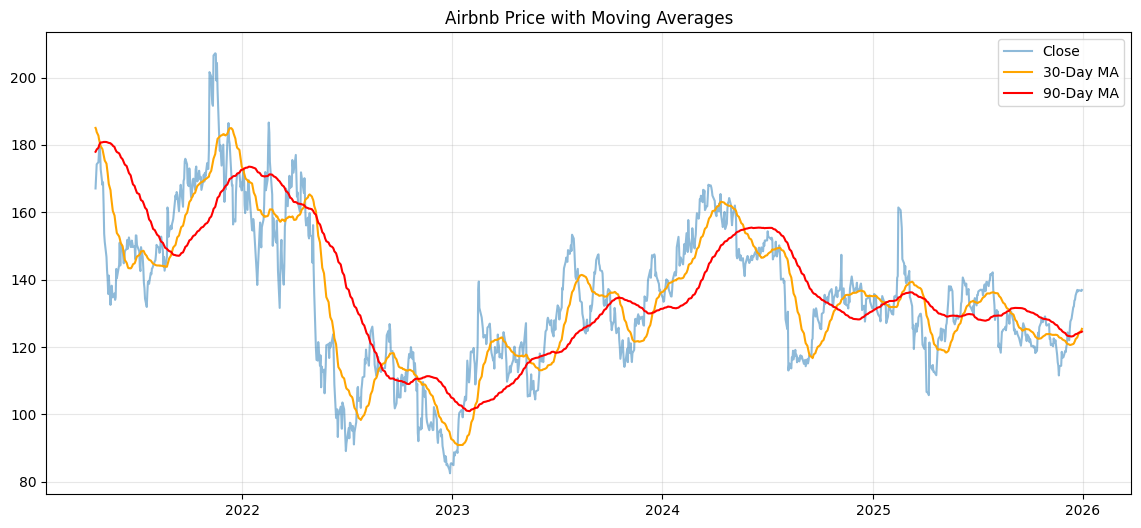

In [25]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['close'], label='Close', alpha=0.5)
plt.plot(df['date'], df['ma_30'], label='30-Day MA', color='orange')
plt.plot(df['date'], df['ma_90'], label='90-Day MA', color='red')
plt.title("Airbnb Price with Moving Averages")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


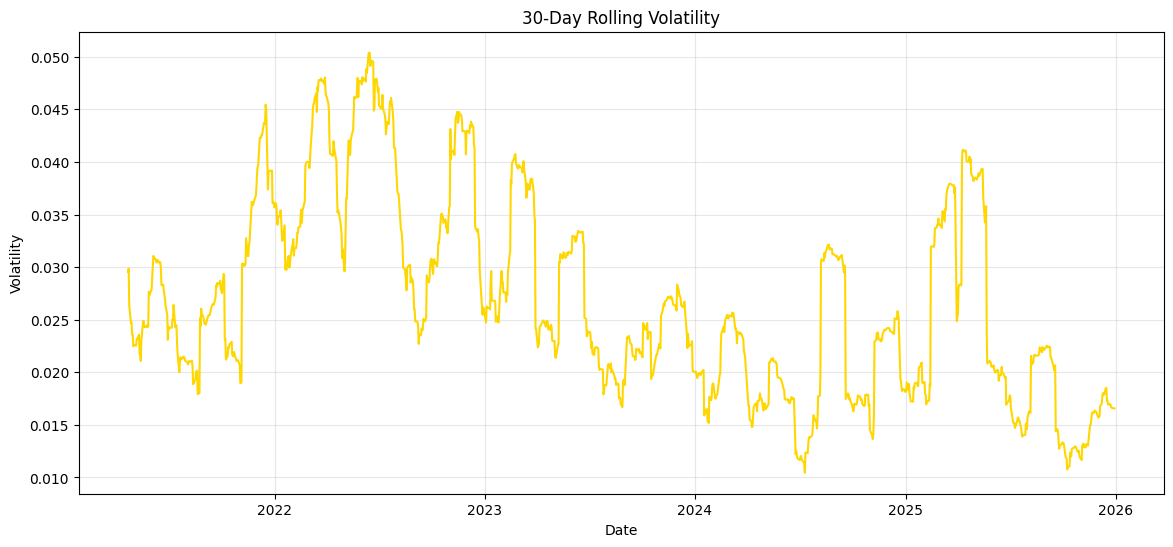

In [26]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['volatility_30d'], color='gold')
plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True, alpha=0.3)
plt.show()


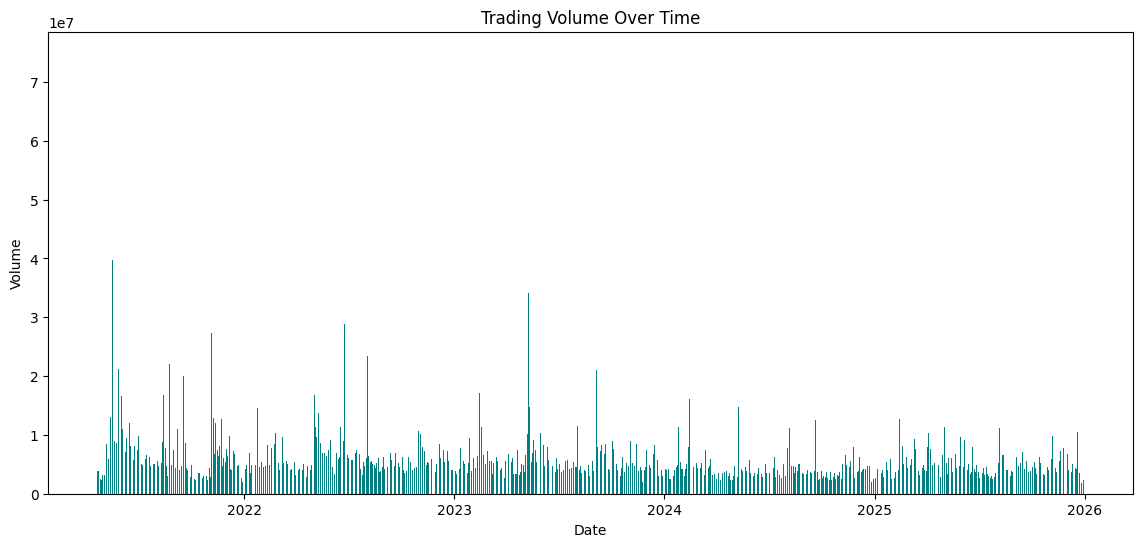

In [28]:
plt.figure(figsize=(14,6))
plt.bar(df['date'], df['volume'], color='teal')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


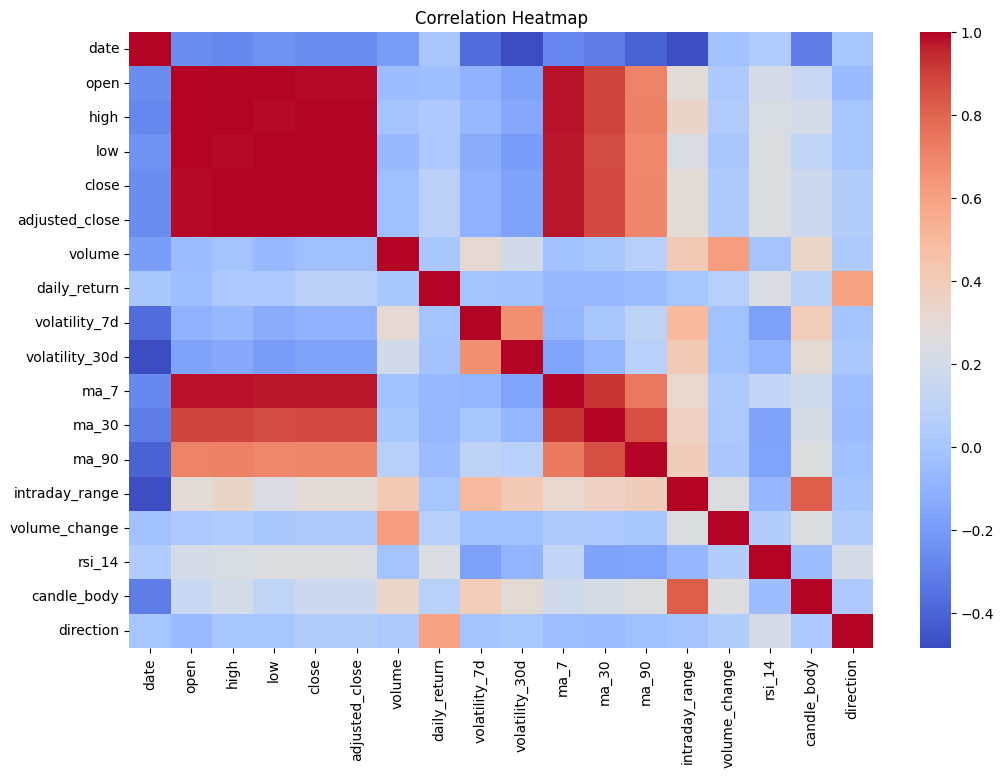

In [29]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [30]:
import pandas as pd

df = df.sort_values("date").set_index("date")
y = df["close"]


In [33]:
df_ml = df.copy()
df_ml["target"] = df_ml["close"].shift(-1)
df_ml = df_ml.dropna()


In [34]:
from sklearn.model_selection import train_test_split

X = df_ml.drop("target", axis=1)
y = df_ml["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [36]:
next_day_pred = rf.predict(X.tail(1))
next_day_pred


array([136.26661634])